In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import imageio

In [ ]:
!unzip "/content/data.zip"

In [ ]:
def build_DataFrame(path):
    with open(path) as f:
        lines = f.readlines()
    mice_dict = {}
    table = []
    times = []
    for l in lines[3:]:
        values = l.strip().split(',')
        time = eval(values.pop(0))
        times.append(time)
        values = [eval(v) if v!='' else -1 for v in values]
        table.append(values)
    table = np.array(table)
    for i, (mouse, body) in enumerate(zip(lines[0].strip().split(',')[1:],
                                          lines[1].strip().split(',')[1:])):
        if i%3==0:
          val = 'likelyhood'  
        elif i%3==1:
          val = 'x' 
        else:
          val = 'y'
            
        mice_dict[mouse, body, val] = table[:, i]
    return np.array(times), pd.DataFrame(mice_dict)

In [ ]:
import itertools
parts = ['leftEar', 'bodycentre', 'lefthindlimb', 'tailbase','rightEar', 'nose',  'righthindlimb', 'tailtip']
days = ["Day1", "Day2", "Day3", "Day4", "Day5"]
trials = ["Trial1", "Trial2", "Trial3", "Trial4", "Trial5", "Trial6", "Trial7", "Trial8", "Trial9", "Trial10"]
paired = list(itertools.product(days, trials))
print(paired)

[('Day1', 'Trial1'), ('Day1', 'Trial2'), ('Day1', 'Trial3'), ('Day1', 'Trial4'), ('Day1', 'Trial5'), ('Day1', 'Trial6'), ('Day1', 'Trial7'), ('Day1', 'Trial8'), ('Day1', 'Trial9'), ('Day1', 'Trial10'), ('Day2', 'Trial1'), ('Day2', 'Trial2'), ('Day2', 'Trial3'), ('Day2', 'Trial4'), ('Day2', 'Trial5'), ('Day2', 'Trial6'), ('Day2', 'Trial7'), ('Day2', 'Trial8'), ('Day2', 'Trial9'), ('Day2', 'Trial10'), ('Day3', 'Trial1'), ('Day3', 'Trial2'), ('Day3', 'Trial3'), ('Day3', 'Trial4'), ('Day3', 'Trial5'), ('Day3', 'Trial6'), ('Day3', 'Trial7'), ('Day3', 'Trial8'), ('Day3', 'Trial9'), ('Day3', 'Trial10'), ('Day4', 'Trial1'), ('Day4', 'Trial2'), ('Day4', 'Trial3'), ('Day4', 'Trial4'), ('Day4', 'Trial5'), ('Day4', 'Trial6'), ('Day4', 'Trial7'), ('Day4', 'Trial8'), ('Day4', 'Trial9'), ('Day4', 'Trial10'), ('Day5', 'Trial1'), ('Day5', 'Trial2'), ('Day5', 'Trial3'), ('Day5', 'Trial4'), ('Day5', 'Trial5'), ('Day5', 'Trial6'), ('Day5', 'Trial7'), ('Day5', 'Trial8'), ('Day5', 'Trial9'), ('Day5', 'Trial

In [ ]:
import os
from pathlib import Path

mouse1 = []
mouse2 = []
mouse3 = []
mouse4 = []

rootdir = os.getcwd()
path = "/content/data/"
trials_times = []
trials = []

for i in range(1, 6): # 5
  for j in range(1, 11): # 10
    path = Path("/content/data/" + "G1Day" + str(i) + "Trial" + str(j) + ".csv")
    if(path.is_file()):
      #print("/content/data/" + "G1Day" + str(i) + "Trial" + str(j) + ".csv")
      tmp_tuple = build_DataFrame("/content/data/" + "G1Day" + str(i) + "Trial" + str(j) + ".csv")
      tmp_df = tmp_tuple[1]
      trials_times.append(tmp_tuple[0])
    else:
      print(path.name + " is missing !")
      tmp_df = tmp_tuple[1].iloc[0:0]
      trials_times.append(np.array([]))

    mouse1.append(tmp_df['mus1'])
    mouse2.append(tmp_df['mus2'])
    mouse3.append(tmp_df['mus3'])
    mouse4.append(tmp_df['mus4'])

G1Day2Trial8.csv is missing !
G1Day5Trial3.csv is missing !


In [ ]:
print(trials_times[1])

In [ ]:
print(len(mouse1))

50


In [ ]:
i=0
for path in os.listdir("/content/data/"):
  if("G1" in path):
    i += 1
print(i)

48


In [ ]:
mus1_df = pd.concat(mouse1, keys = paired, axis=1)
mus2_df = pd.concat(mouse2, keys = paired, axis=1)
mus3_df = pd.concat(mouse3, keys = paired, axis=1)
mus4_df = pd.concat(mouse4, keys = paired, axis=1)

In [ ]:
for dataframe in [mus1_df, mus2_df, mus3_df, mus4_df]:
    for day in days:
      for trial in trials:
        for bp in parts:
          x = dataframe[day][trial][bp]['x']
          outlier_x = np.abs((x - x.mean(0)) / x.std(0)) > 2
          dataframe.loc[:, (day, trial, bp, 'x')] = x.where(~outlier_x, np.nan)

          y = dataframe[day][trial][bp]['y']
          outlier_y = np.abs((y - y.mean(0)) / y.std(0)) > 2
          dataframe.loc[:, (day, trial, bp, 'y')] = y.where(~outlier_y, np.nan)

    dataframe.replace({-1.0: np.nan}, regex=True, inplace=True)
    dataframe.replace({-1: np.nan}, regex=True, inplace=True)
    dataframe.replace({0: np.nan}, regex=True, inplace=True)

In [ ]:
mus1_df["Day1"]["Trial4"].isna().sum()

bodycentre     likelyhood    3517
               x             3517
               y             3517
leftEar        likelyhood    3517
               x             3517
               y             3517
lefthindlimb   likelyhood    3517
               x             3517
               y             3517
nose           likelyhood    3517
               x             3517
               y             3517
rightEar       likelyhood    3517
               x             3517
               y             3517
righthindlimb  likelyhood    3517
               x             3517
               y             3517
tailbase       likelyhood    3517
               x             3517
               y             3517
tailtip        likelyhood    3517
               x             3517
               y             3517
dtype: int64

In [ ]:
mus1_df["Day1"]["Trial4"].isna().sum()

bodycentre     likelyhood    3581
               x             3524
               y             3581
leftEar        likelyhood    3749
               x             3549
               y             3749
lefthindlimb   likelyhood    4272
               x             3888
               y             4393
nose           likelyhood    4304
               x             4211
               y             4417
rightEar       likelyhood    3722
               x             3528
               y             3722
righthindlimb  likelyhood    3938
               x             3755
               y             3938
tailbase       likelyhood    3777
               x             3658
               y             3777
tailtip        likelyhood    3848
               x             3757
               y             3848
dtype: int64

In [ ]:
mus1_df["Day1"]["Trial4"].shape

(4434, 24)

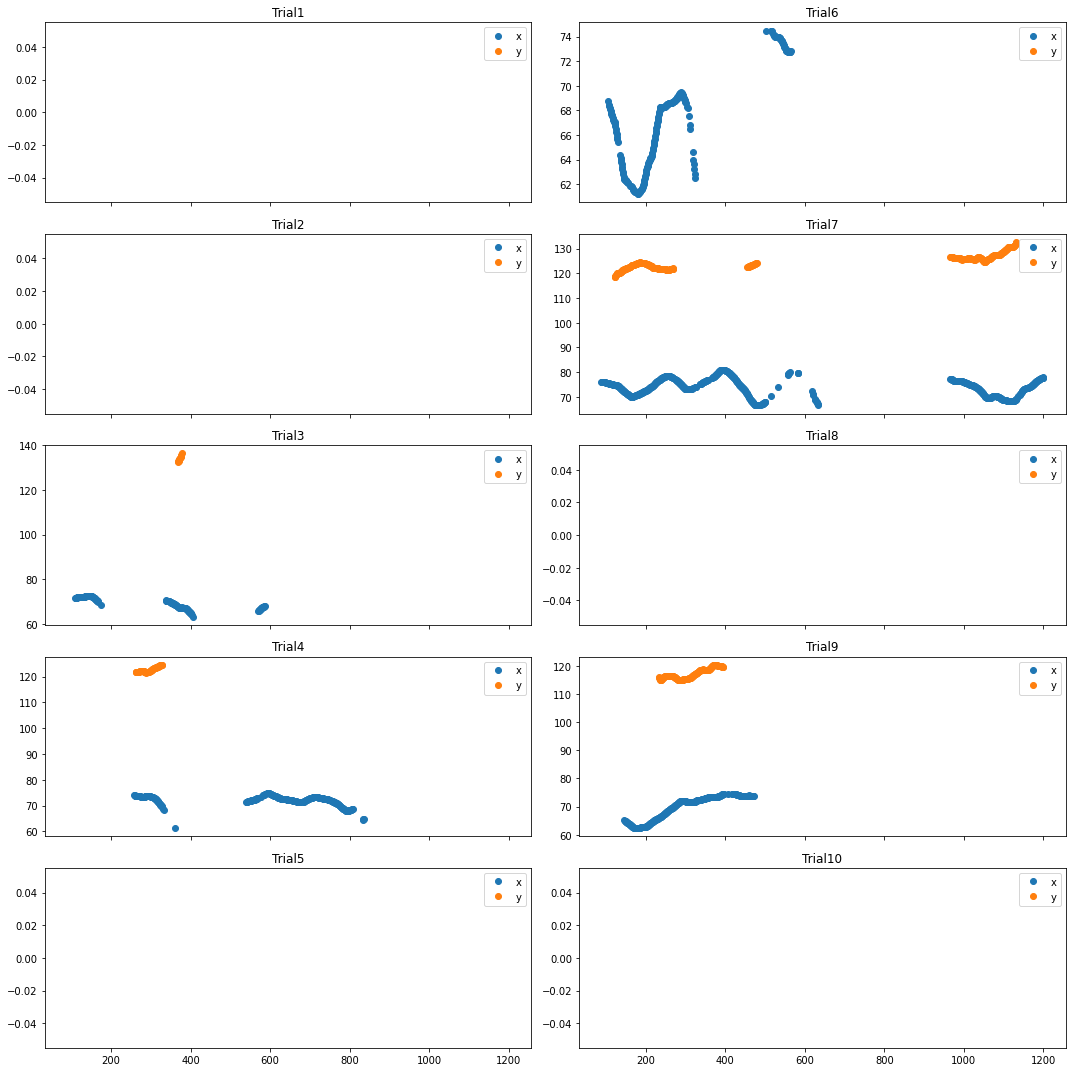

In [ ]:
def plot_same_day(df, day_id, times, bp):
  fig, ax = plt.subplots(5, 2, figsize=(15,15), sharex=True)

  day_id = day_id - 1
  for i in range(10):
    x = df[days[day_id]][trials[i]][bp]['x'].rolling(90).mean()
    y = df[days[day_id]][trials[i]][bp]['y'].rolling(90).mean()
    l = df[days[day_id]][trials[i]][bp]['likelyhood']
    mask = .5<l

    j = day_id * 10 + i

    ax[i%5, i // 5].plot(times[j][mask[:times[j].shape[0]]], x[mask], 'o', label='x')
    ax[i%5, i // 5].plot(times[j][mask[:times[j].shape[0]]], y[mask], 'o', label='y')
    ax[i%5, i // 5].set_title(trials[i])
    ax[i%5, i // 5].legend()
    fig.tight_layout()
plot_same_day(mus1_df, 1, trials_times, "righthindlimb")

In [ ]:
plot_same_day(mus2_df, 3, trials_times, "righthindlimb")

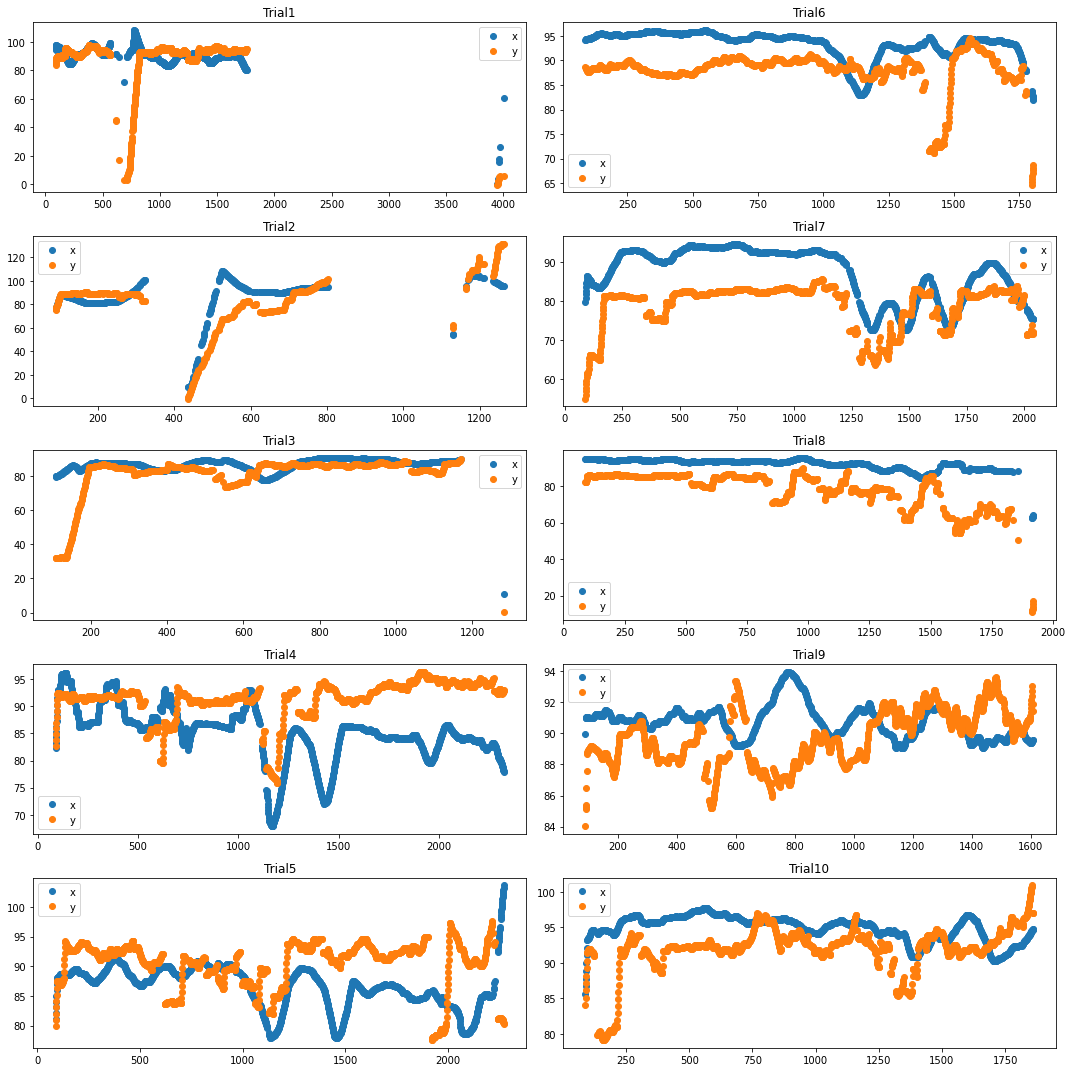

In [ ]:
def plot_max_same_day(df, day_id, times):
  # sharex=True
  fig, ax = plt.subplots(5, 2, figsize=(15,15))
  parts = ['leftEar', 'bodycentre', 'lefthindlimb', 'tailbase','rightEar', 'nose',  'righthindlimb', 'tailtip']
  days = ["Day1", "Day2", "Day3", "Day4", "Day5"]
  trials = ["Trial1", "Trial2", "Trial3", "Trial4", "Trial5", "Trial6", "Trial7", "Trial8", "Trial9", "Trial10"]

  day_id = day_id - 1
  for i in range(10):

    l1 = df[days[day_id]][trials[i]]['lefthindlimb']['likelyhood']
    l2 = df[days[day_id]][trials[i]]['righthindlimb']['likelyhood']

    mask1 = .5<l1
    mask2 = .5<l2

    if(mask1.values.sum() > mask2.values.sum()):
      bp = 'lefthindlimb'
    else:
      bp = 'righthindlimb'


    x = df[days[day_id]][trials[i]][bp]['x'].rolling(90).mean()
    y = df[days[day_id]][trials[i]][bp]['y'].rolling(90).mean()
    l = df[days[day_id]][trials[i]][bp]['likelyhood']
    mask = .5<l
    j = day_id * 10 + i

    ax[i%5, i // 5].plot(times[j][mask[:times[j].shape[0]]], x[mask], 'o', label='x')
    ax[i%5, i // 5].plot(times[j][mask[:times[j].shape[0]]], y[mask], 'o', label='y')
    ax[i%5, i // 5].set_title(trials[i])
    ax[i%5, i // 5].legend()
    fig.tight_layout()
plot_max_same_day(mus2_df, 3, trials_times)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(uf

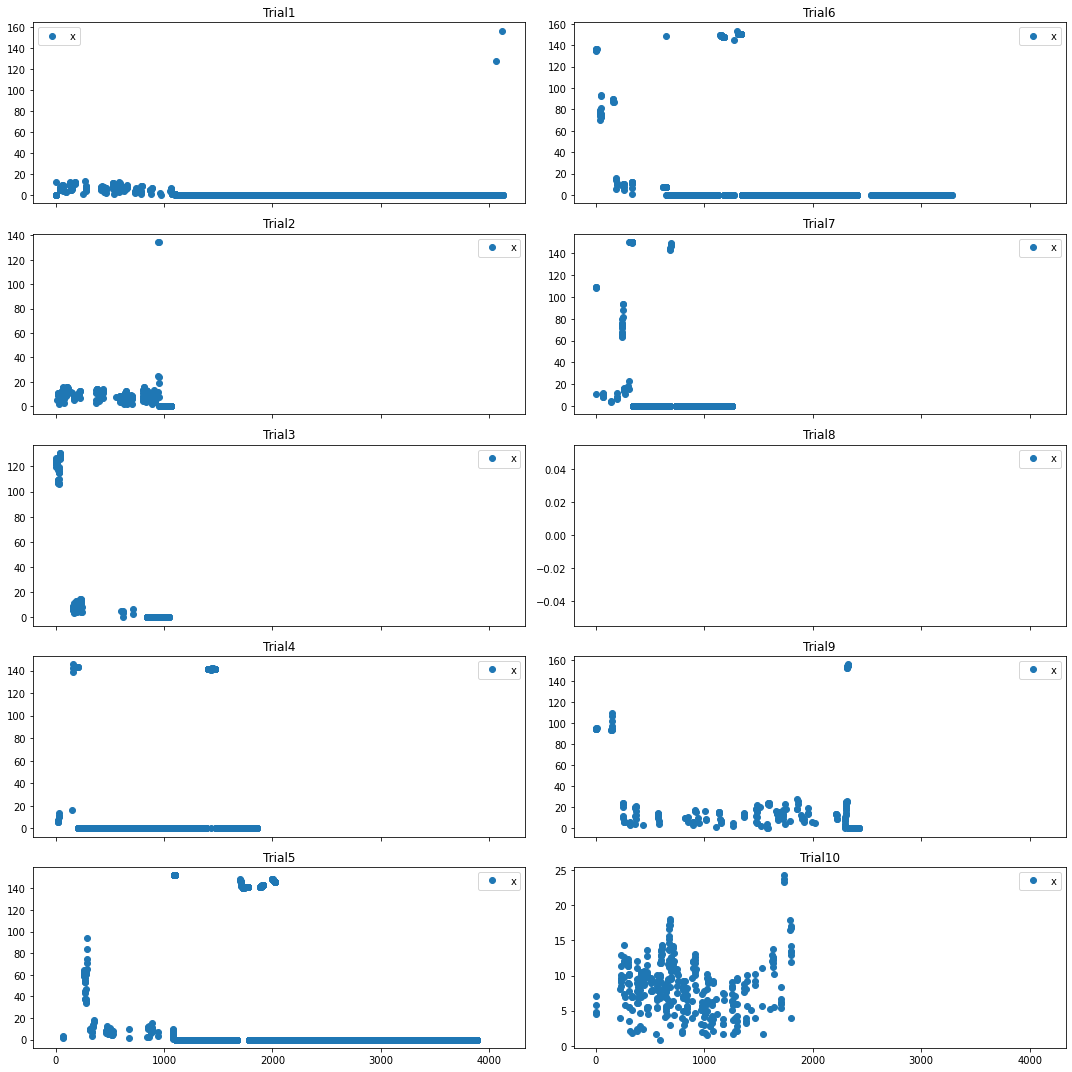

In [ ]:
def plot_distances(df, day_id, times, bp1, bp2):
  fig, ax = plt.subplots(5, 2, figsize=(15,15), sharex=True)
  parts = ['leftEar', 'bodycentre', 'lefthindlimb', 'tailbase','rightEar', 'nose',  'righthindlimb', 'tailtip']
  days = ["Day1", "Day2", "Day3", "Day4", "Day5"]
  trials = ["Trial1", "Trial2", "Trial3", "Trial4", "Trial5", "Trial6", "Trial7", "Trial8", "Trial9", "Trial10"]

  day_id = day_id - 1

  for i in range(10):

    tmp1 = np.square(df[days[day_id]][trials[i]][bp1]['x'] - df[days[day_id]][trials[i]][bp2]['x']) 
    tmp2 = np.square(df[days[day_id]][trials[i]][bp1]['y'] - df[days[day_id]][trials[i]][bp2]['y']) 
    x = np.sqrt(tmp1 - tmp2)

    j = day_id * 10 + i

    ax[i%5, i // 5].scatter(times[j], x[:len(times[j])], 'o', label='')
    ax[i%5, i // 5].set_title(trials[i])
    ax[i%5, i // 5].legend()
    fig.tight_layout()
plot_same_day(mus2_df, 2, trials_times, "bodycentre", 'lefthindlimb')

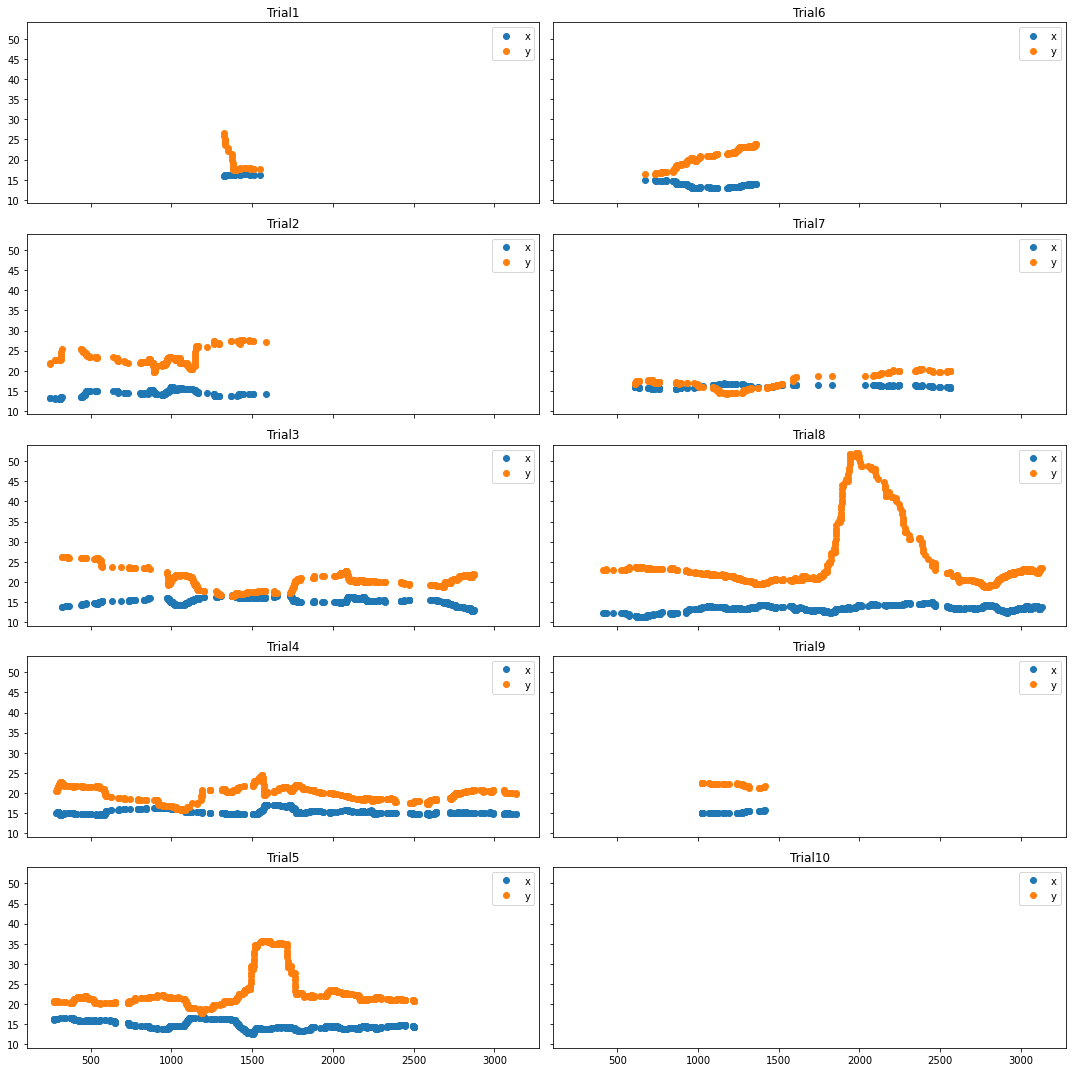

In [ ]:
from re import X
def plot_axe_direction(df, day_id, times, bp1, bp2):
  # sharex=True
  fig, ax = plt.subplots(5, 2, figsize=(15,15), sharex=True, sharey=True)
  #fig, ax = plt.subplots(5, 2, figsize=(15,15))
  parts = ['leftEar', 'bodycentre', 'lefthindlimb', 'tailbase','rightEar', 'nose',  'righthindlimb', 'tailtip']
  days = ["Day1", "Day2", "Day3", "Day4", "Day5"]
  trials = ["Trial1", "Trial2", "Trial3", "Trial4", "Trial5", "Trial6", "Trial7", "Trial8", "Trial9", "Trial10"]

  day_id = day_id - 1

  for i in range(10):

    l1 = df[days[day_id]][trials[i]]['lefthindlimb']['likelyhood']
    l2 = df[days[day_id]][trials[i]]['righthindlimb']['likelyhood']

    mask1 = .5<l1 
    mask2 = .5<l2

    mask = mask1 & mask2

    x = np.abs(df[days[day_id]][trials[i]][bp1]['x'] - df[days[day_id]][trials[i]][bp2]['x'])

    y = np.abs(df[days[day_id]][trials[i]][bp1]['y'] - df[days[day_id]][trials[i]][bp2]['y'])

    j = day_id * 10 + i

    ax[i%5, i // 5].plot(times[j][mask[:times[j].shape[0]]], x[mask].rolling(90).mean(), 'o', label='x')
    ax[i%5, i // 5].plot(times[j][mask[:times[j].shape[0]]], y[mask].rolling(90).mean(), 'o', label='y')
    ax[i%5, i // 5].set_title(trials[i])
    ax[i%5, i // 5].legend()
    fig.tight_layout()

plot_axe_direction(mus2_df, 4, trials_times, 'lefthindlimb', 'bodycentre')

In [ ]:
def plot_variance_mean(df):
  means = []
  variances = []
  for day in days:
    for trial in trials:
      




# Feature engeneering :